# Regression

* It is an implementation of the gradient boosted trees algorithm(decision-tree based).


* Gradient boosting is a supervised leraning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.


* System optimization:
1. Parallelization
2. Tree Pruning
3. Hardware Optimization


* Algorithmic enhancements:
1. Regularization
2. Sparsity awareness
3. Weighted quantile sketch
4. Cross-validation


* This algorithm is build to handle large and complex datasets.


* Decision trees are created in sequential form.


* Weights are assigned to all the independent variables which are then fed into the decision tree whcih predict the results.


* This algorithm provides parallel tree boosting.


* We can use XGBoost for regression, classification(binary and mutliclass), and ranking problems.

In [64]:
#Importing the necessary libraries
import pandas as pd
import plotly.express as px
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score
from datetime import datetime
from sklearn import datasets
import seaborn as sns

In [3]:
#Loading the dataset
data = pd.read_csv("https://hands-on.cloud/wp-content/uploads/2022/04/Dushanbe_house.csv")
data.head(10)

,Unnamed: 0,number_of_rooms,floor,area,latitude,longitude,price
0,0,1,1,58.0,38.585834,68.793715,330000
1,1,1,14,68.0,38.522254,68.749918,340000
2,2,3,8,50.0,NaN,NaN,700000
3,3,3,14,84.0,38.520835,68.747908,700000
4,4,3,3,83.0,38.564374,68.739419,415000
5,5,3,4,53.0,38.530686,68.745261,513000
6,6,2,12,67.0,38.587168,68.786996,360000
7,7,2,4,52.0,NaN,NaN,397000
8,8,2,7,95.0,NaN,NaN,499000
9,9,2,15,73.0,38.538394,68.754725,450000


In [34]:
data.describe()

,Unnamed: 0,number_of_rooms,floor,area,latitude,longitude,price
count,5579.000000,5579.000000,5579.000000,5579.000000,3730.000000,3730.000000,5.579000e+03
mean,2789.000000,2.502420,7.106291,78.076358,38.553452,68.768399,5.840748e+05
std,1610.662907,1.228378,4.577408,38.749944,0.030199,0.056909,4.129821e+05
min,0.000000,1.000000,0.000000,16.000000,37.511664,68.667721,3.900000e+02
25%,1394.500000,2.000000,3.000000,50.000000,38.530576,68.739065,3.430000e+05
50%,2789.000000,2.000000,6.000000,68.000000,38.560678,68.761022,4.850000e+05
75%,4183.500000,3.000000,10.000000,93.000000,38.572482,68.789177,7.000000e+05
max,5578.000000,6.000000,23.000000,370.000000,38.615876,71.509309,8.814000e+06


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5579 non-null   int64  
 1   number_of_rooms  5579 non-null   int64  
 2   floor            5579 non-null   int64  
 3   area             5579 non-null   float64
 4   latitude         3730 non-null   float64
 5   longitude        3730 non-null   float64
 6   price            5579 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 305.2 KB


In [37]:
(data.isna().sum() / len(data)) * 100

Unnamed: 0          0.00000
number_of_rooms     0.00000
floor               0.00000
area                0.00000
latitude           33.14214
longitude          33.14214
price               0.00000
dtype: float64

In [5]:
#Creating a 3D scatter plot
fig = px.scatter_3d(x=data['price'],y=data['latitude'],z=data['longitude'],color=data['price'],title='3D Graph')
fig.show()

In [7]:
#Checking the house prices distribution
y = list(data['price'])
y_axis = random.sample(y,200)
fig = px.bar(x=[i for i in range(len(y_axis))],y=y_axis)
fig.show()

## Splitting the dataset

In [9]:
#taking the columns from the dataset
columns = data.columns

#storing the input and output variables
x = data[columns[0:-1]]
y = data[columns[-1]]

In [10]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [12]:
#printing the default parameters of XGBoostmodel
xgb = XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [14]:
#Fitting the model
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [16]:
#Making predictions
xgb_preds = xgb.predict(x_test)

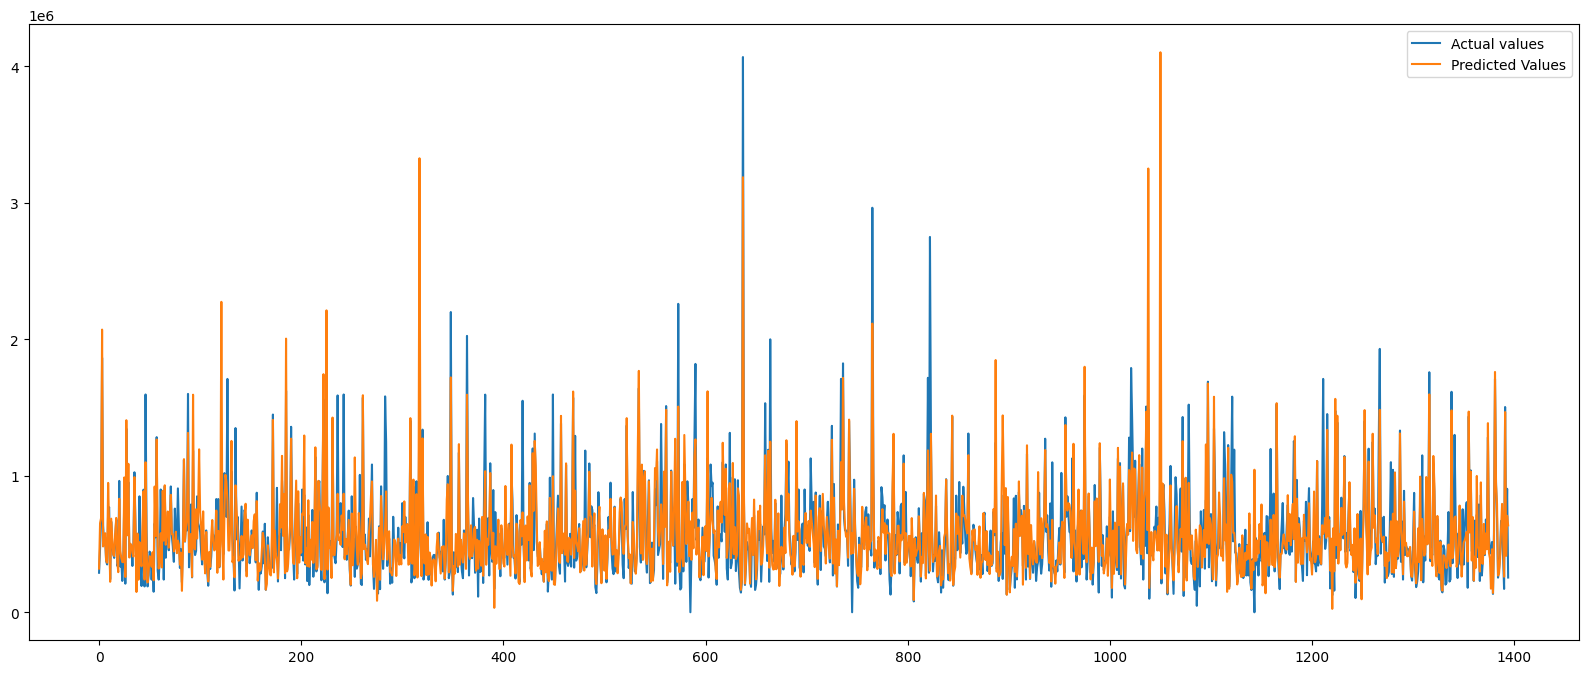

In [17]:
plt.figure(figsize=(20,8))

#plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test,label='Actual values')
plt.plot([i for i in range(len(y_test))],xgb_preds,label='Predicted Values')

plt.legend()
plt.show()

In [18]:
#Checking the accuracy
print('R score is:',r2_score(y_test,xgb_preds))

R score is: 0.6097350733779615


## Using GridSearchCV to find the optimum parameters

* divmod() function returns a tuple containing the quotient and the remainder when argument1(dividend) is divided by argument2(divisor). 

In [19]:
#function to print the total time
def timer(start_time=None):
    
    #starting time
    if not start_time:
        start_time = datetime.now()
        return start_time
    
    #ending time
    elif start_time:
        thour,temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(temp_sec,60)
        
    #printing the total time
    print('\n Time taken: %i hours %i minutes and %s seconds.'%(thour,tmin,round(tsec,2)))

In [20]:
#defining parameters and their values
params={'n_estimators':range(1,50),'learning_rate':[0.1,0.2,0.4,0.6],'max_depth':[2,4,5,6,8]}

In [22]:
#Searching for optimal parameters
model = XGBRegressor()

#applying GridSearchCV
grid = GridSearchCV(estimator=model,cv=2,param_grid=params,scoring='neg_mean_squared_error')

#timing starts from this point for "start_time" variable
start_time=timer(None)

#fitting the model
grid.fit(x_train,y_train)

#timing ends here for "start_time" variable
timer(start_time)

#printing the best estimator
print("\nThe best estimator returned by GridSearchCV is:",grid.best_estimator_)


 Time taken: 0 hours 1 minutes and 39.06 seconds.

The best estimator returned by GridSearchCV is: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=46, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


## Model training with the optimum parameters

In [24]:
xg_reg = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=46, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#fitting the model
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=46, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [25]:
#making predictions
preds = xg_reg.predict(x_test)

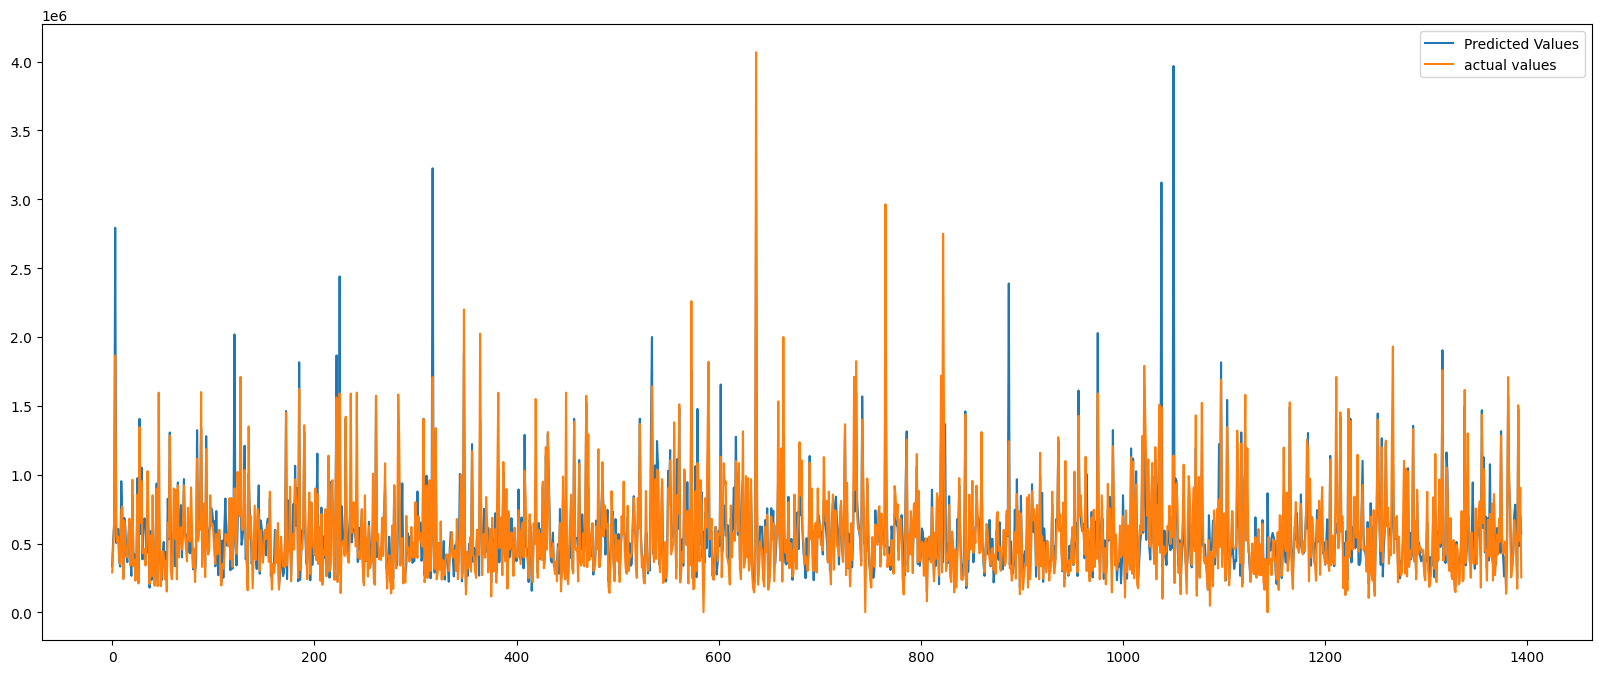

In [30]:
#plotting the graph
plt.figure(figsize=(20,8))

plt.plot([i for i in range(len(y_test))],preds,label='Predicted Values')
plt.plot([i for i in range(len(y_test))],y_test,label='actual values')
plt.legend()
plt.show()

In [32]:
#Checking the accuracy
print('R score is:',r2_score(y_test,preds))

R score is: 0.6363587337318424


# Classification

In [46]:
#loading the data
dataset = datasets.load_digits()

In [47]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [48]:
#printing the information about the dataset
print(dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [50]:
#printing the shape
print("Shape of the image is:",dataset.images.shape)
print("Shape of the dataset is:",dataset.data.shape)

Shape of the image is: (1797, 8, 8)
Shape of the dataset is: (1797, 64)


In [52]:
data = pd.DataFrame(dataset.data,columns=dataset.feature_names)

#printing the independent column
data.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


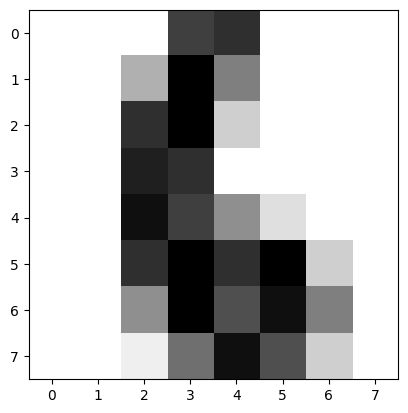

In [53]:
#printing the image of 6
plt.imshow(dataset.images[6],cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()

In [55]:
#splitting the dataset into inputs and outputs
Input,output = datasets.load_digits(return_X_y=True)

In [56]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(Input,output,test_size=0.30)

In [59]:
xg_clf = XGBClassifier()

#fitting the model
xg_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [60]:
#making predictions
xgb_clf_preds = xg_clf.predict(x_test)

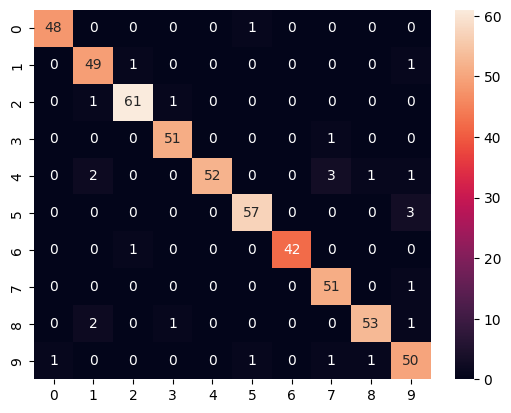

In [63]:
#Checking the accuracy
cm = confusion_matrix(y_test,xgb_clf_preds)
sns.heatmap(cm,annot=True)

plt.savefig('Confusion Matrix.png')

In [65]:
#printing the accuracy score
accuracy_score(y_test,xgb_clf_preds)

0.9518518518518518